In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
#from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Convolution2D, Flatten, MaxPooling2D

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tensorflow.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tflearn.datasets import oxflower17

In [ ]:
# load the data

X,y = oxflower17.load_data()

In [ ]:
print(f'Shape of the Flower Image dataset: {X.shape}\n')
print(f'Number of Images in the dataset : {X.shape[0]}\n')
print(f'Shape of each Image in the dataset : {X.shape[1], X.shape[2], X.shape[3]}')

Shape of the Flower Image dataset: (1360, 224, 224, 3)

Number of Images in the dataset : 1360

Shape of each Image in the dataset : (224, 224, 3)


In [ ]:
print(y.shape)
print(f'Count of each Class from y: {np.unique(y, return_counts=True)}')

(1360,)
Count of each Class from y: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]), array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]))


[668 533 485 743 655]


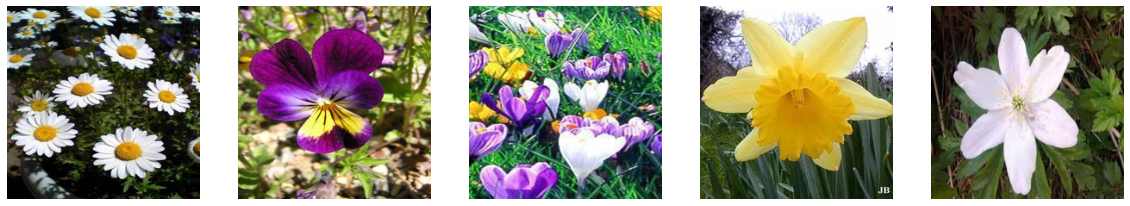

In [ ]:
# Displaying 10 random images

rand = np.random.randint(0, len(X), 5) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])
    plt.axis('off')
plt.show()

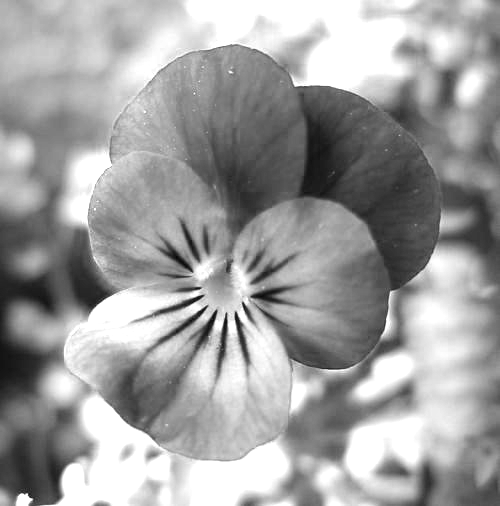

In [ ]:
# Gray scale image

from PIL import Image

# Open an Image
def open_image(path):
  newImage = Image.open(path)
  return newImage

# Save Image
def save_image(image, path):
  image.save(path, 'png')

def create_image(i, j):
  image = Image.new("RGB", (i, j), "white")
  return image

# Pixel. information
def get_pixel(image, i, j):
  # Inside image bounds?
  width, height = image.size
  if i > width or j > height:
    return None

  # Get Pixel
  pixel = image.getpixel((i, j))
  return pixel

# Create a Grayscale version of the image
def convert_grayscale(image):
  # Get size
  width, height = image.size

  # Create new Image and a Pixel Map
  new = create_image(width, height)
  pixels = new.load()

  # Transform to grayscale
  for i in range(width):
    for j in range(height):
      # Get Pixel
      pixel = get_pixel(image, i, j)

      # Get R, G, B pixel values
      red =   pixel[0]
      green = pixel[1]
      blue =  pixel[2]

      # Transform to grayscale
      gray = (red * 0.5) + (green * 0.5) + (blue * 0.5)

      # Set Pixel in new image
      pixels[i, j] = (int(gray), int(gray), int(gray))

  # Return new image
  return new

original = open_image('/content/17flowers/jpg/16/image_1281.jpg')
new = convert_grayscale(original)
save_image(new, '/content/17flowers/jpg/16/image_1281_transformed.jpg')
Image.open('/content/17flowers/jpg/16/image_1281_transformed.jpg')

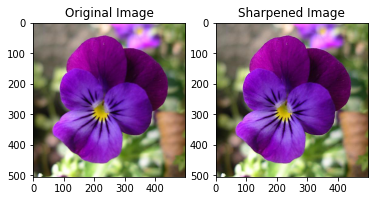

In [ ]:
# Sharpening of the image

from PIL.ImageFilter import SHARPEN
image = Image.open('/content/17flowers/jpg/16/image_1281.jpg')
sharp_image = image.filter(SHARPEN)

img_title = ['Original Image', 'Sharpened Image']
plt.subplot(1,2,1)
plt.title(img_title[0])
plt.imshow(image)

plt.subplot(1,2,2)
plt.title(img_title[1])
plt.imshow(sharp_image)



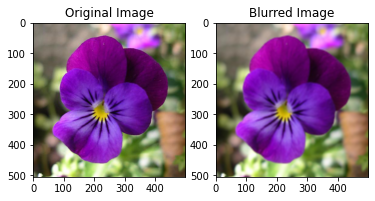

In [ ]:
# Blurring of the image

from PIL.ImageFilter import BLUR

image = Image.open('/content/17flowers/jpg/16/image_1281.jpg')
blur_image = image.filter(BLUR)

img_title = ['Original Image', 'Blurred Image']
plt.subplot(1,2,1)
plt.title(img_title[0])
plt.imshow(image)

plt.subplot(1,2,2)
plt.title(img_title[1])
plt.imshow(blur_image)

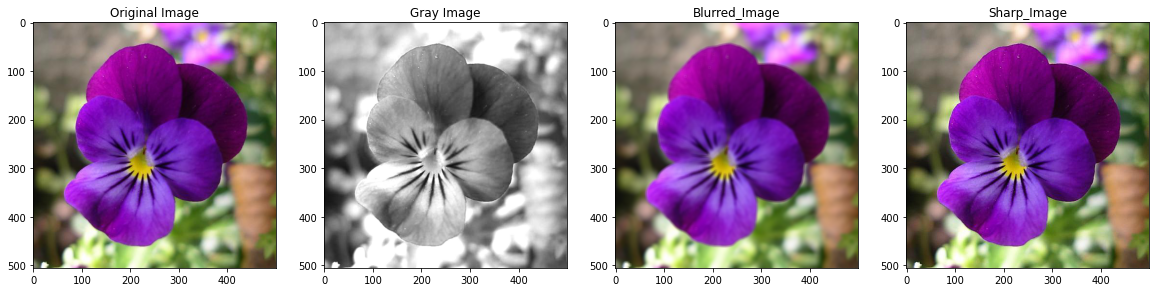

In [ ]:
# Displaying the transformed Images with Original Image

mage_title = ['Original Image', 'Gray Image', 'Blurred_Image', 'Sharp_Image']

plt.figure(figsize=(20,20))
for i,img in enumerate([image, new, blur_image, sharp_image]):
    plt.subplot(1,4,i+1)
    plt.title(image_title[i])
    plt.imshow(img,cmap='gray')

In [ ]:
print(X.shape, y.shape)

(1360, 224, 224, 3) (1360,)


In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Reshaping the train and test data and normalizing train data

X_train = X_train.astype('float32')
X_train_ML = X_train.reshape(X_train.shape[0], 150528) # 224X224X3 = 150528
X_train_ML = X_train_ML/255

X_test = X_test.astype('float32')
X_test_ML = X_test.reshape(X_test.shape[0], 150528) # 224X224X3 = 150528
X_test_ML = X_test_ML/255

In [ ]:
# Supervised ML Model - SVM

SVM = SVC()
SVM.fit(X_train_ML, y_train)

SVM_Accuracy=SVM.score(X_train_ML, y_train)
print("Train Accuracy : ", SVM_Accuracy)

SVM_Accuracy=SVM.score(X_test_ML, y_test)
print("Test Accuracy : ", SVM_Accuracy)

Train Accuracy :  0.9099264705882353
Test Accuracy :  0.46691176470588236


In [ ]:
# Predicting the target of Testing data 
y_predict_test = SVM.predict(X_test_ML)

from sklearn import metrics

print("SVM Model Confusion Matrix For Testing Data :")
cm=metrics.confusion_matrix(y_test, y_predict_test) # label = 

print(cm)

SVM Model Confusion Matrix For Testing Data :
[[10  1  0  0  2  0  0  0  0  0  0  0  1  0  1  0  1]
 [ 0  9  0  0  0  0  0  0  0  1  4  1  0  0  0  1  0]
 [ 0  1 11  0  0  0  0  2  0  0  1  1  0  0  0  0  0]
 [ 3  1  0  8  0  1  2  0  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  1  4  1  6  0  0  0  1  0  0  0  1  0  0]
 [ 2  0  0  0  0  6  1  0  0  3  0  0  0  3  1  0  0]
 [ 0  0  0  1  6  1  4  0  0  0  1  0  0  0  1  0  2]
 [ 0  3  4  0  0  1  0  6  0  1  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  1  0  0  9  0  5  0  0  0  0  0  0]
 [ 0  3  0  0  0  2  0  0  0  8  1  0  1  1  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  2  7  4  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  2  4  8  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0  0  2  2 11  0  0  0  0]
 [ 1  1  0  3  0  1  0  0  0  1  0  0  0  8  0  1  0]
 [ 3  0  0  0  0  2  0  0  0  0  4  0  2  0  3  2  0]
 [ 0  1  0  0  0  1  0  0  0  2  4  1  1  2  0  4  0]
 [ 0  0  0  2  1  0  0  0  0  0  0  0  0  1  1  0 11]]


In [ ]:
# Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix

# Printing the classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54        16
           1       0.38      0.56      0.45        16
           2       0.73      0.69      0.71        16
           3       0.53      0.50      0.52        16
           4       0.31      0.25      0.28        16
           5       0.35      0.38      0.36        16
           6       0.31      0.25      0.28        16
           7       0.67      0.38      0.48        16
           8       1.00      0.56      0.72        16
           9       0.40      0.50      0.44        16
          10       0.21      0.44      0.28        16
          11       0.47      0.50      0.48        16
          12       0.69      0.69      0.69        16
          13       0.53      0.50      0.52        16
          14       0.38      0.19      0.25        16
          15       0.33      0.25      0.29        16
          16       0.79      0.69      0.73        16

    accuracy              

In [ ]:
# Changing the Target parameter as per the requirement of the NN model

# One-Hot encoded outputs

y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [ ]:
#Deep Neural Network Model

backend.clear_session()

random.seed(42)
tensorflow.random.set_seed(42)

model = Sequential()  
model.add(BatchNormalization(input_shape = (150528,)))  ### Batch_Norm Layer
    
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(17, activation='softmax'))
    
# Compile model
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=["accuracy"]) ### Loss function = Categorical cross entropy

# Fit the model
hist = model.fit(X_train_ML, y_train_NN, validation_data=(X_test_ML, y_test_NN), epochs=25, batch_size=8, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.8160 - acc: 0.1020 - val_loss: 2.8090 - val_acc: 0.0772
Epoch 2/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.4596 - acc: 0.1949 - val_loss: 2.8221 - val_acc: 0.0588
Epoch 3/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.3133 - acc: 0.2215 - val_loss: 2.7351 - val_acc: 0.1066
Epoch 4/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.2225 - acc: 0.2767 - val_loss: 2.3953 - val_acc: 0.2059
Epoch 5/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.0742 - acc: 0.2730 - val_loss: 2.1920 - val_acc: 0.2537
Epoch 6/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.0588 - acc: 0.3015 - val_loss: 2.0157 - val_acc: 0.3051
Epoch 7/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 1.8707 - acc: 0.3686 - val_loss: 1.9085 - val_acc: 0.3640
E

Text(0.5, 1.0, 'Epochs Vs Loss (Test Accuracy = 0.47058824)')

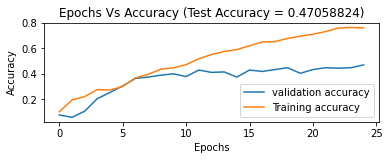

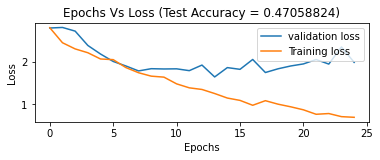

In [ ]:
# Accuracy and Loss plots for Test & Train Data

epochs = range(len(hist.history['acc'])) # Get number of epochs
model.test_accuracy = model.evaluate(X_test_ML, y_test_NN, verbose = 1)

plt.subplot(2,1,1)
plt.plot(epochs, hist.history['val_acc'], label = 'validation accuracy')
plt.plot(epochs, hist.history['acc'], label = 'Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Epochs Vs Accuracy (Test Accuracy = '+str(model.test_accuracy[1])+')')
plt.legend(loc = 'lower right')
plt.figure()

plt.subplot(2,1,2)
plt.plot(epochs, hist.history['val_loss'], label = 'validation loss')
plt.plot(epochs, hist.history['loss'], label = 'Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'upper right')
plt.title('Epochs Vs Loss (Test Accuracy = '+str(model.test_accuracy[1])+')')

In [ ]:
# Predicted Data
y_pred = model.predict(X_test_ML)

# Find out the predictions classes with maximum probability
y_pred = np.argmax(y_pred, axis=1)

# Confusion Matrix for Deep Neural Network Model 
print(f'Confusion Matrix for Deep Neural Network Model :\n\n {confusion_matrix(y_test, y_pred)}\n\n\n')

#  Classification Report for Deep Neural Network Model
print(f'Classification Report for Deep Neural Network Model :\n\n {classification_report(y_test, y_pred)}')

Confusion Matrix for Deep Neural Network Model :

 [[ 6  0  0  3  0  0  2  0  0  0  0  0  0  2  2  0  1]
 [ 0  3  0  0  0  1  0  3  0  4  2  1  0  0  1  1  0]
 [ 0  0 10  0  0  0  0  3  0  0  1  1  1  0  0  0  0]
 [ 7  0  0  1  2  1  1  0  0  0  0  0  0  0  2  1  1]
 [ 2  0  0  0  8  2  1  0  0  0  0  0  0  0  2  0  1]
 [ 1  1  0  2  0  9  0  0  0  2  0  0  0  1  0  0  0]
 [ 5  0  0  0  3  1  5  0  0  0  0  0  0  0  1  0  1]
 [ 0  1  4  0  0  0  0  8  0  0  0  1  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  7  1  4  0  2  0  0  2  0]
 [ 0  5  0  0  0  2  0  0  0  7  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  5  8  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  0  4  7  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1 14  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  1  0  9  2  2  0]
 [ 1  0  0  1  1  5  0  0  0  1  0  1  0  0  6  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  1  1  2  0 10  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  1  0  0 13]]



Classification Report for D

In [ ]:
# Reshaping Train & Test Data & Normalizing Train data

X_train_CN = X_train.reshape(X_train.shape[0], 224, 224, 3) # 224X224X3
X_train_CN = X_train_CN/255

X_test_CN = X_test.reshape(X_test.shape[0], 224, 224, 3) # 224X224X3
X_test_CN = X_test_CN/255

In [ ]:
# CNN Model Architecture Building

backend.clear_session()

random.seed(42)
tensorflow.random.set_seed(42)

model_cn = Sequential()

model_cn.add(BatchNormalization(input_shape = (224, 224, 3)))

model_cn.add(Convolution2D(filters = 64, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3))) 
model_cn.add(MaxPooling2D(pool_size = 3))


model_cn.add(Convolution2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_cn.add(MaxPooling2D(pool_size = 3))

model_cn.add(Convolution2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model_cn.add(MaxPooling2D(pool_size = 3))

model_cn.add(Flatten()) 

# fully connected layer
model_cn.add(Dense(units = 64,activation = 'relu'))
model_cn.add(Dense(units = 32,activation = 'relu'))

# Classification layer
model_cn.add(Dense(units = 17, activation = 'softmax')) 

In [ ]:
optimizer = Adam()
model_cn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_cn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                        

In [ ]:
# Fitting CNN Model on Train Data

MODEL_CN = model_cn.fit(X_train_CN, y_train_NN, epochs = 15, validation_data = (X_test_CN, y_test_NN), initial_epoch=0)

Train on 1088 samples, validate on 272 samples
Epoch 1/15
1088/1088 [==============================] - 2s 2ms/sample - loss: 0.0403 - acc: 0.9908 - val_loss: 2.8329 - val_acc: 0.5478
Epoch 2/15
1088/1088 [==============================] - 2s 2ms/sample - loss: 0.0045 - acc: 1.0000 - val_loss: 2.7722 - val_acc: 0.5625
Epoch 3/15
1088/1088 [==============================] - 2s 2ms/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 2.7852 - val_acc: 0.5699
Epoch 4/15
1088/1088 [==============================] - 2s 2ms/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 2.8294 - val_acc: 0.5699
Epoch 5/15
1088/1088 [==============================] - 2s 2ms/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 2.8455 - val_acc: 0.5662
Epoch 6/15
1088/1088 [==============================] - 2s 2ms/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 2.8546 - val_acc: 0.5662
Epoch 7/15
1088/1088 [==============================] - 2s 2ms/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 2.8809 - val_acc: 0.5699
E

In [ ]:
print(X_train_CN.shape, X_test_CN.shape)

(1088, 224, 224, 3) (272, 224, 224, 3)


Text(0.5, 1.0, 'Epochs Vs Loss (Test Accuracy = 0.56985295)')

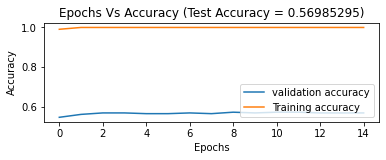

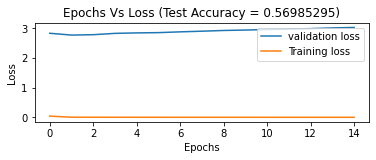

In [ ]:
# Accuracy and Loss plots for Test & Train Data

epochs = range(len(MODEL_CN.history['acc'])) # Get number of epochs
model_cn.test_accuracy = model_cn.evaluate(X_test_CN, y_test_NN, verbose = 1)

plt.subplot(2,1,1)
plt.plot(epochs, MODEL_CN.history['val_acc'], label = 'validation accuracy')
plt.plot(epochs, MODEL_CN.history['acc'], label = 'Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Epochs Vs Accuracy (Test Accuracy = '+str(model_cn.test_accuracy[1])+')')
plt.legend(loc = 'lower right')
plt.figure()

plt.subplot(2,1,2)
plt.plot(epochs, MODEL_CN.history['val_loss'], label = 'validation loss')
plt.plot(epochs, MODEL_CN.history['loss'], label = 'Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'upper right')
plt.title('Epochs Vs Loss (Test Accuracy = '+str(model_cn.test_accuracy[1])+')')

In [ ]:
# Predicted Data
y_pred = model_cn.predict(X_test_CN)

# Find out the predictions classes with maximum probability
y_pred = np.argmax(y_pred, axis=1)

# Confusion Matrix for CNN Model
print(f'CNN Model Confusion Matrix For Testing Dataset:\n\n {confusion_matrix(y_test, y_pred)}\n\n\n')

# Classification Report for CNN Model
print(f'CNN Model Classification Report For Testing Dataset:\n\n {classification_report(y_test, y_pred)}')

CNN Model Confusion Matrix For Testing Dataset:

 [[ 7  0  1  1  1  2  0  0  0  0  0  0  0  0  4  0  0]
 [ 0 13  0  0  0  0  0  0  0  2  0  0  0  0  0  1  0]
 [ 0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  9  1  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 1  0  0  3  7  1  2  0  0  0  0  0  0  0  2  0  0]
 [ 2  1  0  0  0  7  0  1  0  0  0  0  0  0  4  0  1]
 [ 0  0  0  1  1  2  8  0  0  0  0  1  0  0  1  0  2]
 [ 0  2  0  0  0  0  0 12  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  4  1  0  0  0  1  0]
 [ 0  6  0  0  0  0  0  0  0  7  1  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1 11  2  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0  0  7  5  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1 14  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  8  4  1  2]
 [ 2  0  0  0  3  6  0  0  0  1  0  1  0  0  3  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  2  2  2  0  0  8  0]
 [ 0  0  0  3  0  0  1  0  0  0  0  0  0  1  0  0 11]]



CNN Model Classification Rep

In [ ]:
# Test Accuracy much higher with CNN Model hence we predict the Prediction.jpg image with CNN Model though there is overfitting observed 

import cv2
test_image = cv2.imread('/content/drive/MyDrive/Prediction.jpg')

# Resize the image to 224 X 224 shape to be compatible with the model
test_image = cv2.resize(test_image,(224,224))

# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image/255.0

#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))

#Predict the result of the test image using the best model so far in terms of Test Accuracy - CNN Model
result = model_cn.predict(test_image)
  
print(result[0])

# Check the indices Image Data Generator has allotted to each folder
classes_array = np.unique(y)
print(classes_array)
#print (type(classes_array))

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])

# Print the name of the class
print(f'Predicted Class : {classes_array[predicted_index]}')

(224, 224, 3)
After expand_dims: (1, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Predicted Class : 12
